In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
INFILE = '/Users/zachtsouprakos/documents/msds/msds-422/HMEQ_Loss.csv'

TARGET_F = 'TARGET_BAD_FLAG'
TARGET_A = 'TARGET_LOSS_AMT'

In [3]:
df = pd.read_csv(INFILE)
len(df)

5960

In [4]:
df.head()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
#Statistical description of our data set
df.describe()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,1189.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,13414.576955,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,10839.455965,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,224.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,5639.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,11003.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,17634.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,78987.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [6]:
# Lets put all objects and integer variables in their own lists so we can use them later

objList = []
numList = []
dt = df.dtypes

for i in dt.index:
    if i in ([TARGET_F, TARGET_A]) : continue
    if dt[i] in (['object']) : objList.append(i)
    if dt[i] in (['float64','int64']) : numList.append(i)
print('Object list: ',objList)
print('Number liste: ', numList)

Object list:  ['REASON', 'JOB']
Number liste:  ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [7]:
# Number of loans that did (1) and did not (0) default
df.groupby(TARGET_F)[TARGET_F].count()

TARGET_BAD_FLAG
0    4771
1    1189
Name: TARGET_BAD_FLAG, dtype: int64

In [8]:
# Amount of money lost by banks in defaulted loans
print('sum: ', df.groupby(TARGET_F)[TARGET_A].sum())
print('mean: ', df.groupby(TARGET_F)[TARGET_A].mean())
print('median: ', df.groupby(TARGET_F)[TARGET_A].median())

sum:  TARGET_BAD_FLAG
0           0.0
1    15949932.0
Name: TARGET_LOSS_AMT, dtype: float64
mean:  TARGET_BAD_FLAG
0             NaN
1    13414.576955
Name: TARGET_LOSS_AMT, dtype: float64
median:  TARGET_BAD_FLAG
0        NaN
1    11003.0
Name: TARGET_LOSS_AMT, dtype: float64


In [9]:
# Check if any of the object variables predict
for i in objList :
    print(" Class = ", i )
    print(df.groupby( i )[TARGET_F].mean())
    print( " ................. ")
    print(df.groupby( i )[TARGET_A].mean())
    print(" ===============\n\n\n ")

 Class =  REASON
REASON
DebtCon    0.189664
HomeImp    0.222472
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
REASON
DebtCon    16005.163758
HomeImp     8388.090909
Name: TARGET_LOSS_AMT, dtype: float64


 
 Class =  JOB
JOB
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
JOB
Mgr        14141.536313
Office     13475.304000
Other      11570.102888
ProfExe    14660.966981
Sales      16421.447368
Self       22232.362069
Name: TARGET_LOSS_AMT, dtype: float64


 


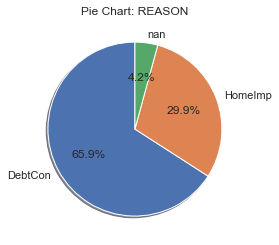

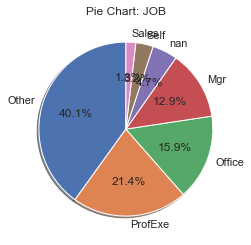

In [10]:
# visualize the above
for i in objList :
    x = df[ i ].value_counts(dropna=False)
    #print( x )
    theLabels = x.axes[0].tolist()
    #print( theLabels )
    theSlices = list(x)
    #print( theSlices ) 
    plt.pie( theSlices,
            labels=theLabels,
            startangle = 90,
            shadow=True,
            autopct="%1.1f%%")
    plt.title("Pie Chart: " + i)
    plt.show()

In [11]:
# Lets see if any of the categorical and numberical variables are missing
for i in objList:
    print('For the object variable', i, 'there are ', df[i].isna().sum(), ' missing values')

print("-------------------------")
    
for i in numList:
    print('For the numerical variable', i, 'there are ', df[i].isna().sum(), ' missing values')

For the object variable REASON there are  252  missing values
For the object variable JOB there are  279  missing values
-------------------------
For the numerical variable LOAN there are  0  missing values
For the numerical variable MORTDUE there are  518  missing values
For the numerical variable VALUE there are  112  missing values
For the numerical variable YOJ there are  515  missing values
For the numerical variable DEROG there are  708  missing values
For the numerical variable DELINQ there are  580  missing values
For the numerical variable CLAGE there are  308  missing values
For the numerical variable NINQ there are  510  missing values
For the numerical variable CLNO there are  222  missing values
For the numerical variable DEBTINC there are  1267  missing values


In [12]:
# Create new fields to represent the existing categorical fields
# Replace each missing value with 'MISSING'
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    print( NAME ) 
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    print( "variable",i," has this many missing", df[i].isna().sum() )
    print( "variable",NAME," has this many missing", df[NAME].isna().sum() )
    g = df.groupby( NAME )
    print( g[NAME].count() )
    print('-----------------------')

IMP_REASON
variable REASON  has this many missing 252
variable IMP_REASON  has this many missing 0
IMP_REASON
DebtCon    3928
HomeImp    1780
MISSING     252
Name: IMP_REASON, dtype: int64
-----------------------
IMP_JOB
variable JOB  has this many missing 279
variable IMP_JOB  has this many missing 0
IMP_JOB
MISSING     279
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: IMP_JOB, dtype: int64
-----------------------


In [13]:
# Create two types of fields. One field to represent whether a numerical field is missing
# Second field type, copy the existing numerical fields and replace them with the median of the field
for i in numList:
    if df[i].isna().sum() == 0 : continue
    FLAG = 'M_' + i
    IMP = 'IMP_' + i
    print(i)
    df[FLAG] = df[i].isna() + 0 # create fields that indicate whether the value was missing
    df[IMP] = df[i]
    df.loc[df[IMP].isna(), IMP] = df[i].median() # replace null values with median for of the column

MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


In [14]:
# For categorical values, create fields that will represent each value in a numerical fashion
for i in objList :
    thePrefix = "z_" + i
    y = pd.get_dummies( df[i], prefix=thePrefix, drop_first=False )
    #print(y)  
    df = pd.concat( [df, y], axis=1 )

In [15]:
example = df.head(20).T
example

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
TARGET_BAD_FLAG,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0
TARGET_LOSS_AMT,641,1109,767,1425,NaN,335,1841,373,1217,1523,1822,1224,1928,NaN,1680,407,2375,224,2017,NaN
LOAN,1100,1300,1500,1500,1700,1700,1800,1800,2000,2000,2000,2000,2000,2000,2100,2200,2200,2200,2300,2300
MORTDUE,25860,70053,13500,NaN,97800,30548,48649,28502,32700,NaN,22608,20627,45000,64536,71000,24280,90957,23030,28192,102370
VALUE,39025,68400,16700,NaN,112000,40320,57037,43034,46740,62250,NaN,29800,55000,87400,83850,34687,102600,NaN,40150,120953
REASON,HomeImp,HomeImp,HomeImp,NaN,HomeImp,HomeImp,HomeImp,HomeImp,HomeImp,HomeImp,NaN,HomeImp,HomeImp,NaN,HomeImp,HomeImp,HomeImp,NaN,HomeImp,HomeImp
JOB,Other,Other,Other,NaN,Office,Other,Other,Other,Other,Sales,NaN,Office,Other,Mgr,Other,Other,Mgr,NaN,Other,Office
YOJ,10.5,7,4,NaN,3,9,5,11,3,16,18,11,3,2.5,8,NaN,7,19,4.5,2
DEROG,0,0,0,NaN,0,0,3,0,0,0,NaN,0,0,0,0,0,2,NaN,0,0
DELINQ,0,2,0,NaN,0,0,2,0,2,0,NaN,1,0,0,1,1,6,NaN,0,0


In [17]:
df.dtypes

TARGET_BAD_FLAG       int64
TARGET_LOSS_AMT     float64
LOAN                  int64
MORTDUE             float64
VALUE               float64
REASON               object
JOB                  object
YOJ                 float64
DEROG               float64
DELINQ              float64
CLAGE               float64
NINQ                float64
CLNO                float64
DEBTINC             float64
IMP_REASON           object
IMP_JOB              object
M_MORTDUE             int64
IMP_MORTDUE         float64
M_VALUE               int64
IMP_VALUE           float64
M_YOJ                 int64
IMP_YOJ             float64
M_DEROG               int64
IMP_DEROG           float64
M_DELINQ              int64
IMP_DELINQ          float64
M_CLAGE               int64
IMP_CLAGE           float64
M_NINQ                int64
IMP_NINQ            float64
M_CLNO                int64
IMP_CLNO            float64
M_DEBTINC             int64
IMP_DEBTINC         float64
z_REASON_DebtCon      uint8
z_REASON_HomeImp    

In [16]:

#df.to_csv('hmeq_module1.csv')